In [101]:
import scipy
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from icecream import ic

# 1. Write a program implementing a linear congruential generator

Write a program implementing a linear congruential generator (LCG). Be sure that the program works correctly using only integer representation.

In [102]:
def congruential_generator(X_0, alpha, c, M, N):
    random_numbers = []
    random_numbers.append(X_0)
    for i in range(N):
        X_n = (alpha * random_numbers[-1] + c) % M
        random_numbers.append(X_n)
    return np.array(random_numbers[1:])

congruental_output = congruential_generator(X_0=3, alpha=129, c=26401, M=6536, N=10000)
congruental_output_2 = congruential_generator(X_0=3, alpha=5, c=1, M=16, N=10000)


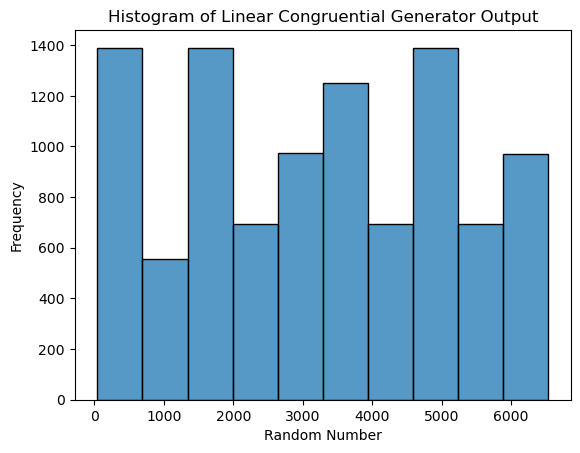

In [103]:
# Plot the histogram
sns.histplot(congruental_output, bins=10, kde=False)
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Linear Congruential Generator Output')
plt.show()

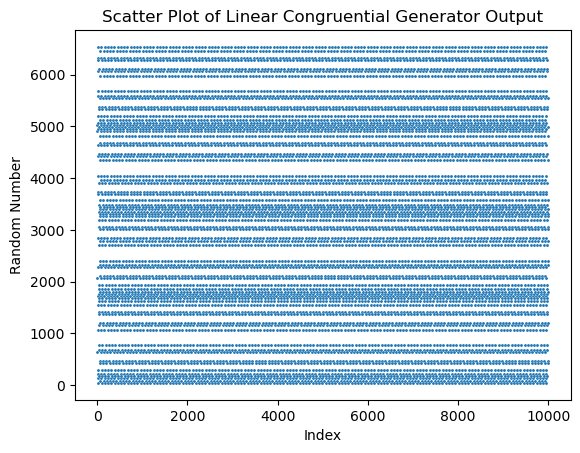

In [104]:
# Create indices for the scatter plot
indices = np.arange(1, len(congruental_output) + 1)

# Plot the scatter plot
sns.scatterplot(x=indices, y=congruental_output, s=5)
plt.xlabel('Index')
plt.ylabel('Random Number')
plt.title('Scatter Plot of Linear Congruential Generator Output')
plt.show()

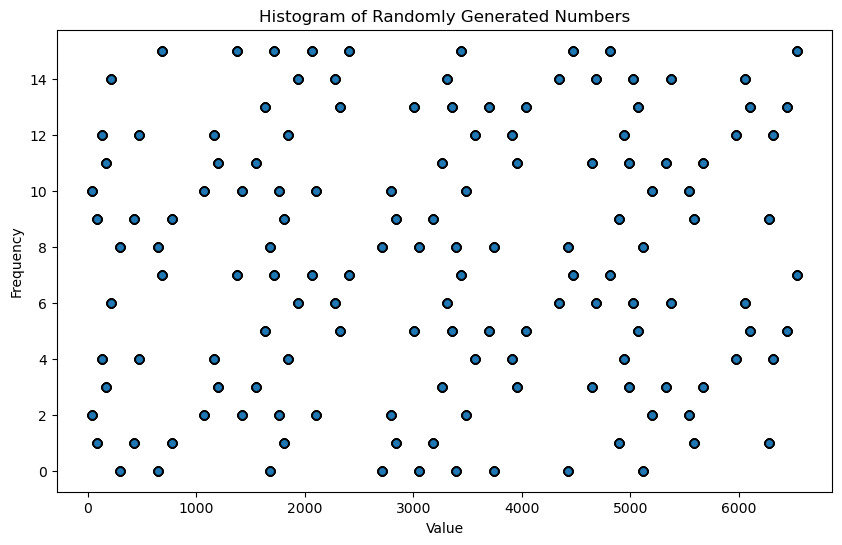

In [105]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.scatter(congruental_output, congruental_output_2, edgecolor='black')
plt.title('Histogram of Randomly Generated Numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Evaluate the quality of the generator by graphical descriptive statistics (histogrammes, scatter plots) and statistical tests- χ2,Kolmogorov-Smirnov, run-tests, and correlation test.

## Chi Squared Test

In [106]:
# BIN THE OBSERVATIONS

classes = 10 
# Compute the histogram for the observed data
observed, bin_edges = np.histogram(congruental_output, bins=classes)

# Compute the expected frequencies assuming uniform distribution over the same range
total_count = len(congruental_output)
expected = np.ones(classes)*10000/classes

print(observed)
print(expected)

[1389  556 1390  694  973 1250  694 1388  695  971]
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]


In [107]:
# Define the test statistic function
def test_statistic(observed, expected):
    T = 0
    for o, e in zip(observed, expected):
        T += ((o - e) ** 2) / e
    return T


# Calculate the test statistic
test_statistic_value = test_statistic(observed, expected)
print("Test Statistic:", test_statistic_value)


Test Statistic: 995.468


In [108]:

# Define the chi-squared p-value function
def chi_squared_p_value(test_statistic, degrees_of_freedom):
    p_value = chi2.sf(test_statistic, degrees_of_freedom)
    return p_value

# Calculate the p-value
degrees_of_freedom = classes - 1
p_value = chi_squared_p_value(test_statistic_value, degrees_of_freedom)
print("P-Value:", p_value)

P-Value: 1.6359693482882364e-208


# Run Test 1 

In [155]:
median = np.median(congruental_output)
ic(median)

n1 = sum(congruental_output > median) 
n2 = sum(congruental_output < median)
ic(n1)
ic(n2)


# Calculate number of runs
prev = None
pos_runs = 0
neg_runs = 0

for num in congruental_output:
    if num > median:
        if prev is None or prev <= median:
            pos_runs += 1
        prev = num
    elif num < median:
        if prev is None or prev >= median:
            neg_runs += 1
        prev = num

print("Positive runs:", pos_runs)
print("Negative runs:", neg_runs)

T = pos_runs + neg_runs
ic(T)
    

ic| median: 3267.0
ic| n1: 4998
ic| n2: 4863
ic| T: 5555


Positive runs: 2777
Negative runs: 2778


5555

# Run tests 2

# Run tests 3

In [130]:
n1 = sum(congruental_output > median)
n2 = sum(congruental_output < median)
ic(n1, n2)

ic| n1: 4998, n2: 4863


(4998, 4863)

In [131]:
expected_runs = (2 * n1 * n2) / (n1 + n2) + 1
standard_deviation_runs = np.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / ((n1 + n2)**2 * (n1 + n2 - 1)))
ic(expected_runs, standard_deviation_runs)


ic| expected_runs: 4930.575905080621
    standard_deviation_runs: 49.63945977076403


(4930.575905080621, 49.63945977076403)

In [132]:
z_value = (T - expected_runs) / standard_deviation_runs
ic(z_value)


ic| z_value: 99.3246928489587


99.3246928489587

In [133]:
from scipy.stats import norm

p_value = 2 * (1 - norm.cdf(abs(z_value)))  # two-tailed test
ic(p_value)

ic| p_value: 0.0


0.0